# Predicting heart disease using machine learning

This notebook looks into using varius Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.

we´re going to take the following approach:
1. Problem definition (Already above)
2. Data
3. Evaluation
4. Features (wich one contributes more to the model)
5. Modeling
6. Experimentation

## 1. Problem definition

In a statment,
> Giving clinical parameters about a patient can we predict whether or not the have heart disease

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. 
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

This is a goal you should set with your team asking how are we going to pursue this model

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proog of concept, we´ll pursue the project

## 4. Features

This is where you´ll get different information about each of the features in your data

**Create Data Dictionary**

1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format : 1 = male 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7. restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina : 1 = yes 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no


## Preparing the tools

we´re going to use pandas, matplotlib and Numpy for data analysis and manipulation

In [66]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear  inside the notebook
%matplotlib inline

# Model from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [67]:
df = pd.read_csv('heart-disease-2025.csv')
df.shape

(303, 15)

## Data Exploration (Exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject ametter export on the dataset you're working with

There is a short check list:
1. What question(s) are you trying to solve
2. What kind of data do we have anf how do we treat different types?
3. What´s missing from data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [68]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [69]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [70]:
# Let's find out how many of each class there are
df['target'].value_counts()
# you can realize from the output that it is relativly balanced
# wich is a balanced classification problem

target
yes    165
no     138
Name: count, dtype: int64

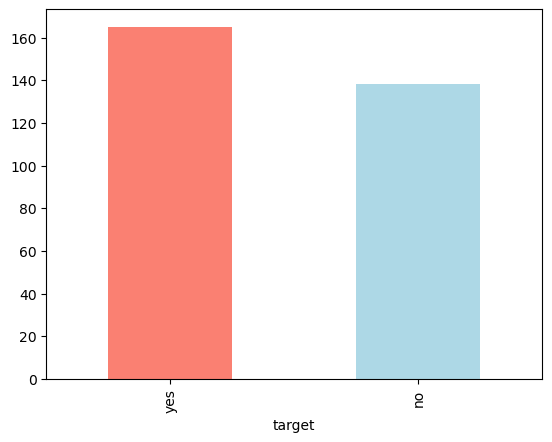

In [71]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [73]:
# Are there any missing values
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [74]:
df.describe()

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,87.612784,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,151.000000,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,226.500000,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,302.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Now we just have had some quick insight about the data

Finding Patterns

### Heart disease Frequency according to Sex

In [75]:
# compare different columns with each other
# start gaining some intuition about how the features relate to the target
# we are going to compare independent variables to our dependent (Target)
# variable
# How do the relate to the target?

In [76]:
df['sex'].value_counts()

sex
male      207
female     96
Name: count, dtype: int64

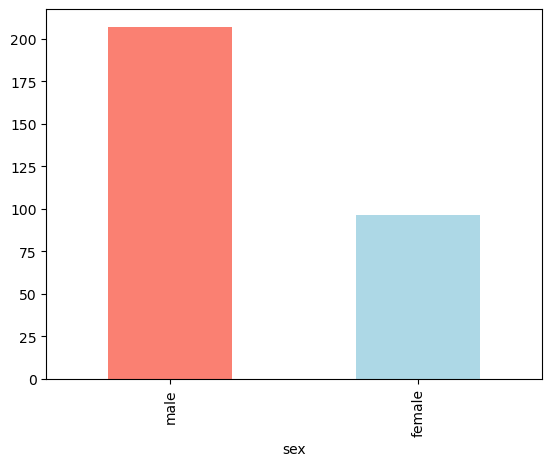

In [77]:
df['sex'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.show()

In [78]:
# how to copare sex to the target column
# you can use crosstab
pd.crosstab(df.target, df.sex)

sex,female,male
target,,
no,24,114
yes,72,93


You now can intuate something from here. For a women on its sample, is more likely to have heart disease

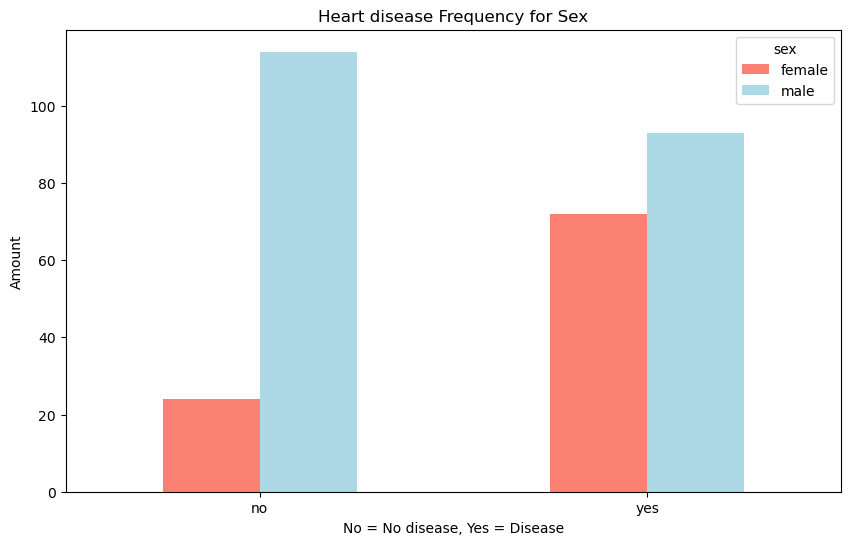

In [79]:
pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon', 'lightblue'])
plt.title('Heart disease Frequency for Sex')
plt.xlabel('No = No disease, Yes = Disease')
plt.ylabel('Amount')
plt.xticks(rotation = 0)
plt.show()

Finding Patterns 2

In [80]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df['thalach'].value_counts()
# there are so many differents values

### Age vs. Max Heart Rate for Heart Disease

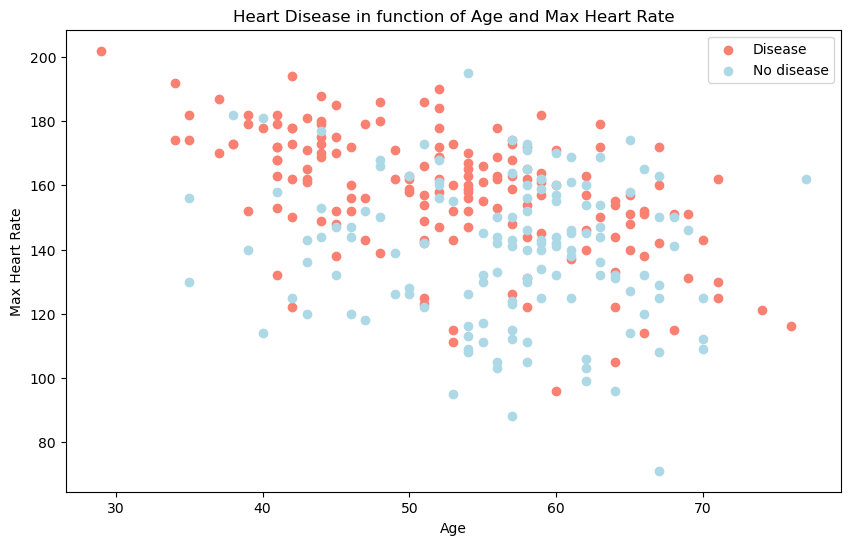

In [82]:
# create another figure
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 'yes'], # taking the age where target equals 1
           df.thalach[df.target == 'yes'],
           c = 'salmon') 

# Scatter wiht negative examples
plt.scatter(df.age[df.target == 'no'], # taking the age where target equals 1
           df.thalach[df.target == 'no'],
           c = 'lightblue')

# add some helful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No disease'])
plt.show()

you can see that there is a negative trend. The younger someone is, the higher the max heart rate. It is hard to decide wich age is more able to have heart disease, because the data is mixed up. But ML will find some patterns.

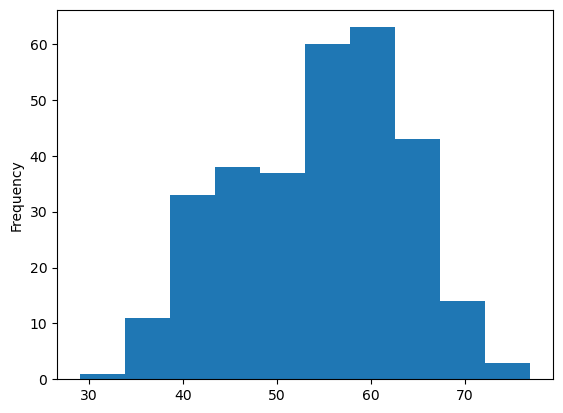

In [83]:
# check the distribution of the age column with a histogram
df.age.plot.hist()
plt.show()

### Heart Disease Frequency per Chest Type

In [84]:
pd.crosstab(df.cp, df.target)

target,no,yes
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


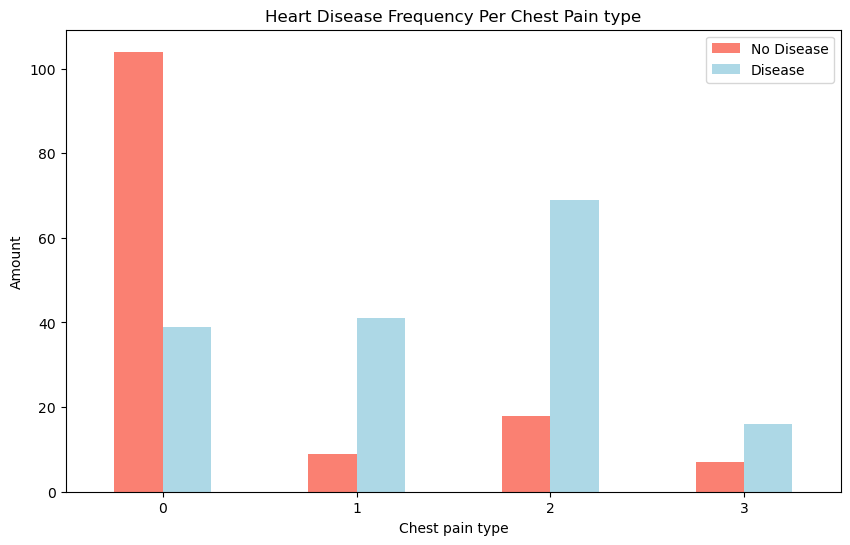

In [85]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                  figsize = (10,6),
                                  color = ['salmon', 'lightblue'])

# add some comunication
plt.title('Heart Disease Frequency Per Chest Pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0)

plt.show()

Finding Patterns 3

Now, we are going to build a correlation Matrix wich tell us how each independent variables interac with each other. ¿Is it positive or negative?

In [86]:
df = pd.read_csv('heart-disease-2025.csv', index_col = 0) # usar la primera columna como index
df.shape

(303, 14)

In [87]:
# Make correlation matrix
df.corr()

ValueError: could not convert string to float: 'male'

We need to work with numerical variables...let's modify some columns

In [88]:
# change the sex column values to number
df['sex'] = df['sex'].replace({'male':1, 'female': 0})
df.sex

C:\Users\Sebastian Perez Vega\AppData\Local\Temp\ipykernel_18684\2345633138.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male':1, 'female': 0})


0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [89]:
df['target'] = df['target'].replace({'yes': 1, 'no': 0})
df.target

C:\Users\Sebastian Perez Vega\AppData\Local\Temp\ipykernel_18684\3876970396.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'yes': 1, 'no': 0})


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [90]:
df.shape

(303, 14)

In [91]:
# Now we are ready to use correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.064347,-0.197387,0.045032,-0.058196,-0.051491,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279570,-0.064347,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,-0.142035
chol,0.213465,-0.197387,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,-0.086563
fbs,0.121308,0.045032,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.396302,-0.051491,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,0.413252
exang,0.096801,0.141664,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193827,0.053098,0.005747,-0.058770,-0.346806,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


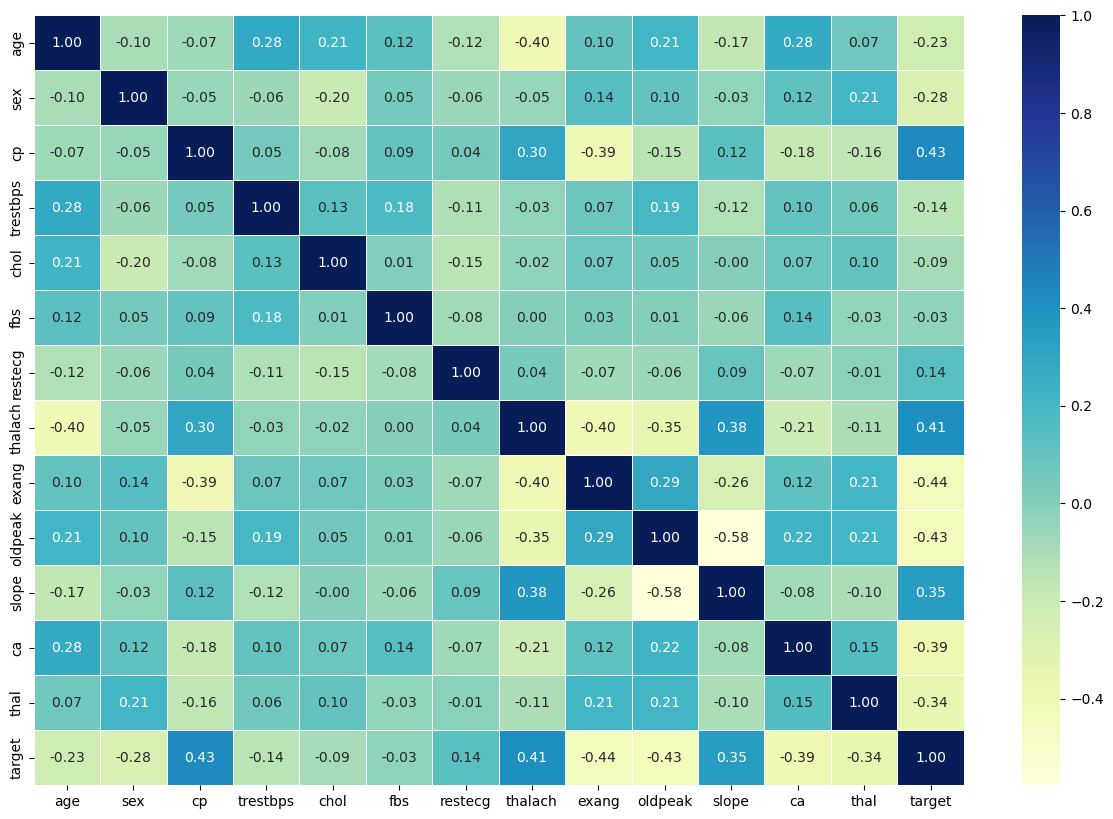

In [92]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu')
plt.show()

**Correlación Positiva**
Una correlación positiva significa que cuando una variable aumenta, la otra variable también tiende a aumentar, y viceversa (cuando una disminuye, la otra también disminuye). Ambas se mueven en la misma dirección.

**Valor:** El coeficiente de correlación será positivo, acercándose a +1.
Un valor de +1 indica una correlación positiva perfecta (se mueven exactamente en la misma dirección).
Un valor cercano a +1 (por ejemplo, 0.8 o 0.9) indica una correlación positiva fuerte.
Un valor cercano a 0 (pero positivo, por ejemplo, 0.1 o 0.2) indica una correlación positiva débil.

**Ejemplo de Correlación Positiva:**
>Horas de estudio y calificaciones: Generalmente, a medida que un estudiante dedica más horas a estudiar, sus calificaciones tienden a ser más altas. Si estudia menos, sus calificaciones tienden a ser más bajas. Se mueven en la misma dirección.

>Temperatura y ventas de helado: Cuando la temperatura aumenta, las ventas de helado también tienden a aumentar. Cuando hace frío, las ventas de helado bajan.

>Altura y peso: Por lo general, las personas con mayor altura tienden a tener un mayor peso.

**Correlación Negativa**
Una correlación negativa (o inversa) significa que cuando una variable aumenta, la otra variable tiende a disminuir, y viceversa (cuando una disminuye, la otra aumenta). Ambas se mueven en direcciones opuestas.

**Valor:** El coeficiente de correlación será negativo, acercándose a -1.
Un valor de -1 indica una correlación negativa perfecta (se mueven exactamente en direcciones opuestas).
Un valor cercano a -1 (por ejemplo, -0.8 o -0.9) indica una correlación negativa fuerte.
Un valor cercano a 0 (pero negativo, por ejemplo, -0.1 o -0.2) indica una correlación negativa débil.

**Ejemplo de Correlación Negativa:**
> Precio de un producto y su demanda: Cuando el precio de un producto aumenta, la demanda por ese producto tiende a disminuir. Si el precio baja, la demanda sube.

> Velocidad de conducción y tiempo de viaje: Si aumentas la velocidad a la que conduces, el tiempo que tardas en llegar a tu destino disminuye.

> Ejercicio físico y grasa corporal: A medida que aumentas la cantidad de ejercicio físico, tu porcentaje de grasa corporal tiende a disminuir.

exang- Exercise induced angina : 1 = yes 0 = no

This has a negative correlation with the target, wich means if someone gets chest pain durign exercise (exang = 1), their chance of having heart disease goes down (target = 0)

we could keep doing this but what we want to do next is a model driven. Bulid a machine learning model to drive inside on how the independent variables contributes to the target variable.

Preparing Our Data For Machine Learning

## 5. Modelling

In [93]:
# see the data
df.head()
# we are using the independent variable to predict the target (dependent variable)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [94]:
# Split data into X and y
X = df.drop('target', axis = 1)

y = df['target']

In [95]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3


In [96]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [97]:
# split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

In [98]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120.0,295.0,0,1,162.0,0,0.0,2,0,2
202,58,1,0,150.0,270.0,0,0,111.0,1,0.8,2,0,3
196,46,1,2,150.0,231.0,0,1,147.0,0,3.6,1,0,2
75,55,0,1,135.0,250.0,0,0,161.0,0,1.4,1,0,2
176,60,1,0,117.0,230.0,1,1,160.0,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140.0,233.0,0,1,163.0,0,0.6,1,1,3
71,51,1,2,94.0,227.0,0,1,154.0,1,0.0,2,1,3
106,69,1,3,160.0,234.0,1,0,131.0,0,0.1,1,1,2
270,46,1,0,120.0,249.0,0,0,144.0,0,0.8,2,0,3


In [99]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we´ve hot our data split into training and test sets, it´s time to build a machine learning model.

We will train it (find the patterns) on the training set.

And we'll test is (use the patterns) on the test set.

What machine learning model should we use?

https://scikit-learn.org/stable/machine_learning_map.html

Let's try the following models:

https://scikit-learn.org/stable/modules/neighbors.html

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

LogisticRegression? But it is not on classification

Choosing The Right Models

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [100]:
# Put the models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test_labels
    """
    # Set Random Seed
    np.random.seed(42)

    # make a dictionary to keep model score
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

Experimenting With Machine Learning Models

In [101]:
# How each of this model has performed

In [102]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [103]:
# where are the NaN values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**trestbps- Resting Blood Pressure:** displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

**chol- Serum Cholestrol:** displays the serum cholesterol in mg/dl (unit)

**thalach- Max heart rate achieved:** displays the max heart rate achieved by an individual.

In [104]:
# copy the Df, just in case
filled_X = X.copy()
filled_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2


In [105]:
# watch NaN values
filled_X.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [106]:
# fill NaN values
filled_X['trestbps'] = filled_X['trestbps'].fillna(int(filled_X['trestbps'].mean()))
filled_X['chol'] = filled_X['chol'].fillna(int(filled_X['chol'].mean()))
filled_X['thalach'] = filled_X['thalach'].fillna(int(filled_X['thalach'].mean()))

In [107]:
filled_X.isna().sum()
# brilliant

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [108]:
# check the data filled X and y
filled_X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,0,0,131.0,354.0,0,1,163.0,1,0.6,2,0,2


In [109]:
# Now will have to do the split again
np.random.seed(42)

filled_X_train, filled_X_test, y_train, y_test = train_test_split(filled_X,
                                                                y,
                                                                test_size = 0.2)

In [110]:
filled_X_train.shape, filled_X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [111]:
# Now we can use the function from above to see the scores
model_scores = fit_and_score(models = models,
                            X_train = filled_X_train,
                            X_test = filled_X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

### Model Comparison

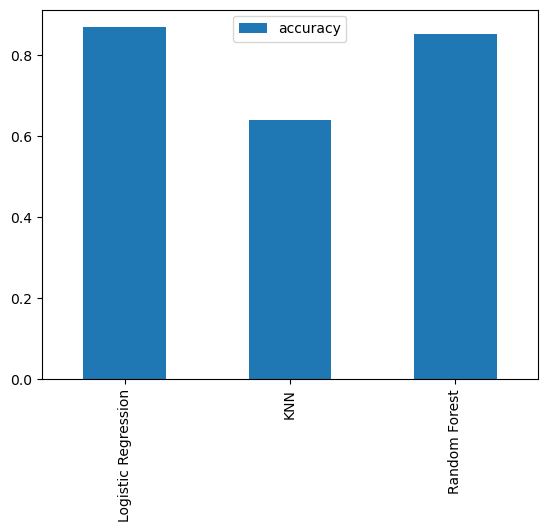

In [112]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()
plt.show()

Tuning/Improving Our Model

Now we have got a baseline model and we know our model first predcitions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance

The nexts are specifics for classification problem:

* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [113]:
# Lets's tune KNN
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # fit the algorithm
    knn.fit(filled_X_train, y_train)

    # update the trainig scores list
    train_scores.append(knn.score(filled_X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(filled_X_test, y_test))

In [114]:
train_scores

[1.0,
 0.8099173553719008,
 0.7892561983471075,
 0.7520661157024794,
 0.768595041322314,
 0.7603305785123967,
 0.7355371900826446,
 0.7231404958677686,
 0.7107438016528925,
 0.6983471074380165,
 0.7272727272727273,
 0.6942148760330579,
 0.6900826446280992,
 0.6983471074380165,
 0.6859504132231405,
 0.6776859504132231,
 0.6859504132231405,
 0.6611570247933884,
 0.6735537190082644,
 0.6694214876033058]

In [115]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6721311475409836,
 0.639344262295082]

Maximun KNN score on the test data: 72.13%


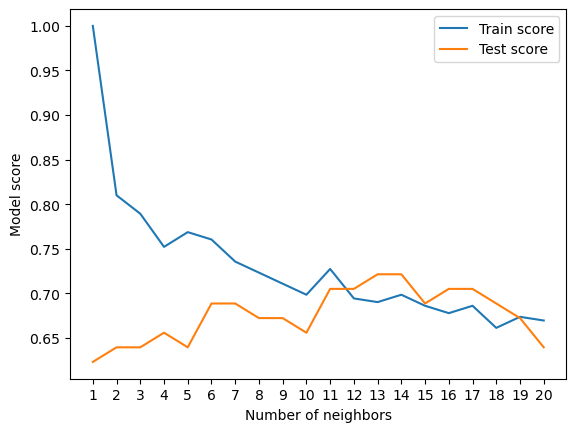

In [116]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 21, 1)) # de 1 a 21 con espacio de 1
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximun KNN score on the test data: {max(test_scores) * 100:.2f}%')
plt.show()

we have improved the KNN model from 63% to 72%. We are going to discard KNN

Tuning Hyperparameters

## Hyperparameter tunning with RandomizedSearchCV

We're goinh to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [117]:
# Create a Hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# create hyperparameter grid for RandomClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1, 20, 2)}

Now we have got hyperparameters grids set up for each of our models, let's tune them using RandomizedSearchCV

Tuning Hyperparameters 2

In [118]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv = 5,
                               n_iter = 20, # 20 different combinations
                               verbose = True) # it will output a few things

# fit random hyperparametr search model for LogisticRegression
rs_log_reg.fit(filled_X_train, y_train)
# the output will show the best param

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [119]:
# check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

In [120]:
rs_log_reg.score(filled_X_test, y_test)

0.8360655737704918

Our first result was 0.86

Now we have tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [121]:
# Set up random seed
np.random.seed(42)

# set up random Hyperparameter search fro RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

#fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(filled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [123]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(15),
 'max_depth': 3}

In [124]:
# evaluate the randomized search RandomForestClassifier model
rs_rf.score(filled_X_test, y_test)

0.8688524590163934

Our first result was 0.8524590163934426

In [125]:
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

We are going to keep up with LogisticRegression since has the best results

Tuning Hyperparameters 3

## Hyperparameter Tuning with GridSearchCV

Sice our LogisticRegression model provides the best scores so far, we will try and improve them again using GridSearchCV

In [126]:
# Different Hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Setup grid hyperparameter search for logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid, # has a different name from RS 
                         cv = 5,
                         verbose = True)

#fit grid hyperparameter searchmodel
gs_log_reg.fit(filled_X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [127]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [128]:
# evaluate the grid search LogisticRegression model
gs_log_reg.score(filled_X_test, y_test)

0.8852459016393442

In [129]:
# compare with the first one
model_scores

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426}

It has improve!!!!

Evaluating Our Model

Remember that the default score for a classification problem is 'accuracy'. Now we are going to create some evaluation metrics aroud our model beyond accuracy.

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation used where possible

Remember, evaluate a model is always comparing our model predictions with truth labels. So let's make some predictions first

In [130]:
# Make predictionss with tuned model
y_preds = gs_log_reg.predict(filled_X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [131]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

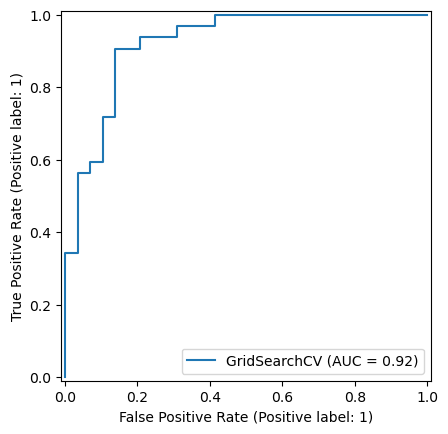

In [132]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, filled_X_test, y_test)
plt.show()

A Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR), offering insights into the trade-off between correctly identifying positive cases and incorrectly classifying negative cases as positive.

The ideal ROC curve is one that reaches the top-left corner of the plot, indicating a perfect classifier with a TPR of 1 and an FPR of 0. In practice, most models fall short of this ideal, and the ROC curve helps visualize their performance. The Area Under the Curve (AUC) is a common metric derived from the ROC curve, quantifying the overall performance of the model, with higher AUC values indicating better performance.

In [133]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


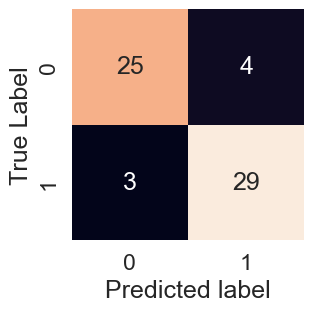

In [134]:
# Use seaborn
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seabonr's heatmap()
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True, # Annotate into the boxes
                    cbar = False)
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')
    plt.show()
plot_conf_mat(y_test, y_preds)

Evaluating Our Model 2

Now we have got a ROC curve, an AUC metric and a confusion metrix, let's get a classificaiton report as well a croos-validated precision and f1-score

In [135]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Precision:** proportion of positive indentifications. If it not produces false postives has a precision of 1.0

**Recall:** actual positives correctly classified. If it not produces false negatives has a Recall of 1.

**F1:** combination of **precision** and **recall**. If precision and recall were 1, f1 would be 1.0

we are going to recalculate those metrics but using cross-validation

Evaluating Our Model 3

### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall adn f1-score of our model using cross-validation

In [136]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [137]:
# create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')

In [138]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        filled_X,
                        y,
                        cv = 5,
                        scoring = 'accuracy')
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.88333333, 0.75      ])

In [139]:
cv_acc = np.mean(cv_acc)

In [140]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        filled_X,
                        y,
                        cv = 5,
                        scoring = 'precision')
cv_precision

array([0.775     , 0.86111111, 0.85714286, 0.86111111, 0.725     ])

In [141]:
cv_precision = np.mean(cv_precision)

In [142]:
# Cross-Validated recall
cv_recall = cross_val_score(clf,
                        filled_X,
                        y,
                        cv = 5,
                        scoring = 'recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [143]:
cv_recall = np.mean(cv_recall)

In [144]:
# Cross-validated f1
cv_f1 = cross_val_score(clf,
                        filled_X,
                        y,
                        cv = 5,
                        scoring = 'f1')
cv_f1

array([0.84931507, 0.89855072, 0.88235294, 0.89855072, 0.79452055])

In [145]:
cv_f1 = np.mean(cv_f1)

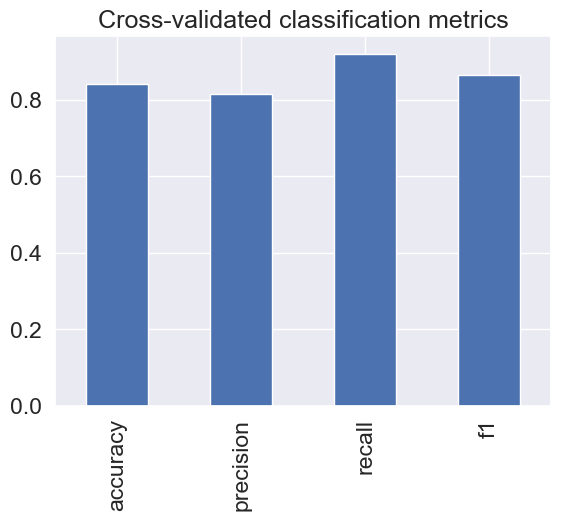

In [146]:
# Visualize our cross-validate metrics
cv_metrics = pd.DataFrame({'accuracy': cv_acc,
                          'precision': cv_precision,
                          'recall': cv_recall,
                          'f1': cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = 'Cross-validated classification metrics', 
                      legend = False)
plt.show()

Recall is doing pretty well. Our model in general is doing good

Finding The Most Important Features

### Feature importance

Feature importance is another asking, 'wich features contributed most to the outcomes of the model and how did they contribute?'

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for (MODEL NAME) feature importance.

Let's find the feature importance for our LogisticRegression model...

In [151]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                        solver = 'liblinear')

clf.fit(filled_X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [152]:
# Check coef_ 
# this shows us how each parameter, independent variables, contributed
# to the labels
clf.coef_

array([[ 0.00234187, -0.83952441,  0.66173458, -0.01089717, -0.00148085,
         0.03271521,  0.31650931,  0.02354064, -0.59622482, -0.57083464,
         0.4732697 , -0.64798806, -0.67464384]])

In [154]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.002341869125561585),
 'sex': np.float64(-0.8395244104011785),
 'cp': np.float64(0.6617345760155539),
 'trestbps': np.float64(-0.010897165689676205),
 'chol': np.float64(-0.0014808512399719722),
 'fbs': np.float64(0.03271520533738515),
 'restecg': np.float64(0.3165093085294247),
 'thalach': np.float64(0.02354063990427327),
 'exang': np.float64(-0.5962248223382121),
 'oldpeak': np.float64(-0.5708346431339963),
 'slope': np.float64(0.4732696962720975),
 'ca': np.float64(-0.647988058766847),
 'thal': np.float64(-0.6746438366038151)}

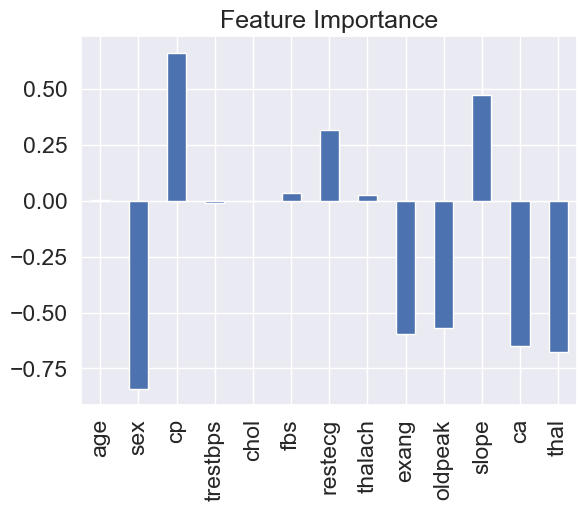

In [161]:
# Visualizae feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])

# plot it
feature_df.T.plot.bar(title = 'Feature Importance', legend = False)
plt.show()

In [163]:
# here we are doing EDA, exploratory data anlysis
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [164]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

We already have done some experimentation

what we have done so far...
<img src = 'ml101-6-step-ml-framework.png'>

we could not get a model with 95% of accuracy.
But our best model was LogisticRegression() with 86%.

If you haven't hit your evaluation metric yet...ask youself...

* Could you collect more data?
* Could you try a better model on th scikitlearn map? Like CatBoost or XGboost?
* Could we improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit you evaluation metric) How would you export it and share it with others 